In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
from allison.linear_models.logistic_regression import LogisticRegression
from allison.utils.functions.loss import binary_cross_entropy
from allison.utils.functions.activation import Sigmoid
from allison.utils.metrics import accuracy,predict_labels

In [46]:
def numeric_labels(categorical_labels):

    labels=list(set(categorical_labels))
    numeric_labels=[]

    for cat_label in categorical_labels:
        if cat_label in labels:
            numeric_labels.append(labels.index(cat_label))
    
    return sorted(numeric_labels)

In [48]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
data['labels']=numeric_labels(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [50]:
data=data[data['labels']<2]

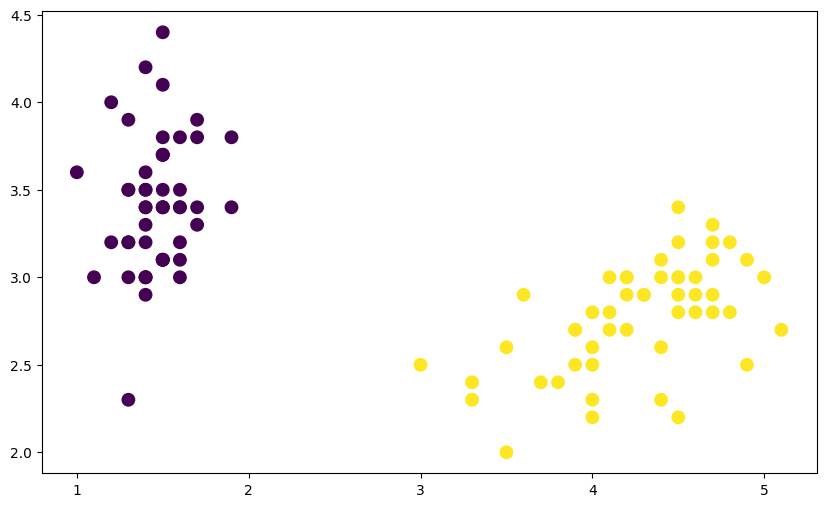

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(data['PetalLengthCm'],data['SepalWidthCm'],s=80,c=data['labels'] )

In [53]:
features=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm',]].to_numpy()
labels=data['labels'].to_numpy()

In [54]:
model=LogisticRegression()

model.optimizers(loss_function=binary_cross_entropy,
                 metric=accuracy,
                 learning_rate=0.001)

In [57]:
model.train(features,labels,10)  

Iter:	1	==================================================>	 precision: 50.000% 

Iter:	2	==================================================>	 precision: 50.000% 

Iter:	3	==================================================>	 precision: 50.000% 

Iter:	4	==================================================>	 precision: 50.000% 

Iter:	5	==================================================>	 precision: 50.000% 

Iter:	6	==================================================>	 precision: 50.000% 

Iter:	7	==================================================>	 precision: 97.000% 

Iter:	8	==================================================>	 precision: 100.000% 

Iter:	9	==================================================>	 precision: 99.000% 

Iter:	10	==================================================>	 precision: 99.000% 



In [42]:
model

model: Logistic Regression 
model_bias: [-0.08202905] 
model_weights: [ 0.05815558 -0.2123458   0.14716075] 

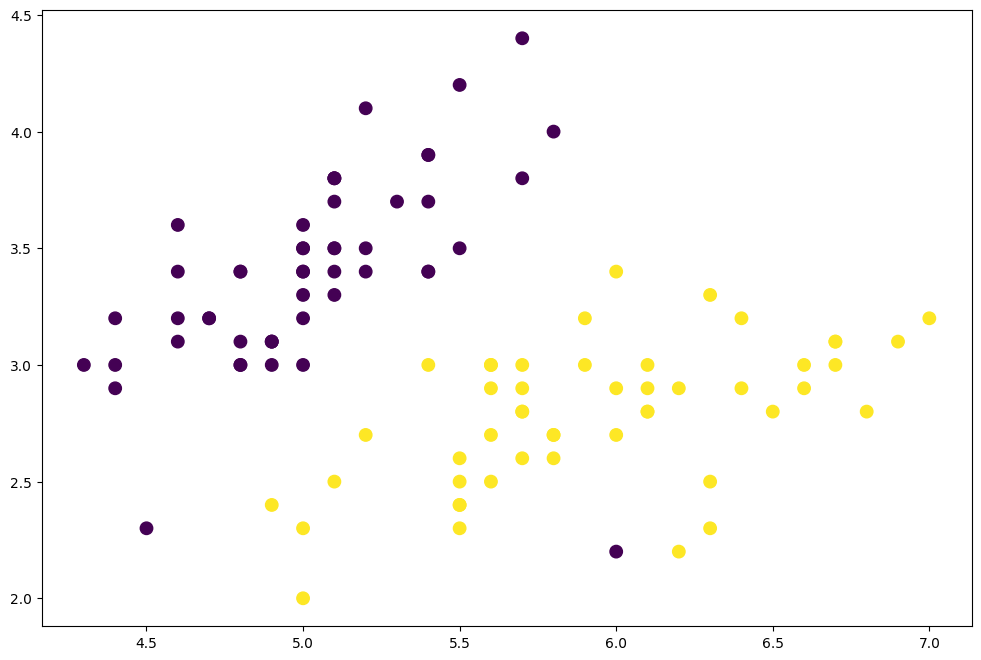

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],s=80,c=model.predict(features))